# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
print(soup)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [7]:
# Extract all rows of data
all_rows = soup.find_all('tr', class_='data-row')
print(all_rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

In [10]:
headers = [header.text.strip() for header in soup.find_all('th')]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in all_rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data, columns=headers)

In [14]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [16]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert 'sol', 'ls', 'month' to integers
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)

# Convert 'min_temp' and 'pressure' to floats
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)


In [17]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?
num_months = mars_weather_df['month'].nunique()
num_months

12

In [20]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_weather_df['sol'].nunique()
num_sols

1867

In [21]:
# 3. What is the average minimum temperature by month?
# Group the data by 'month' and calculate the mean of 'min_temp' for each month
avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the result
print(avg_min_temp)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


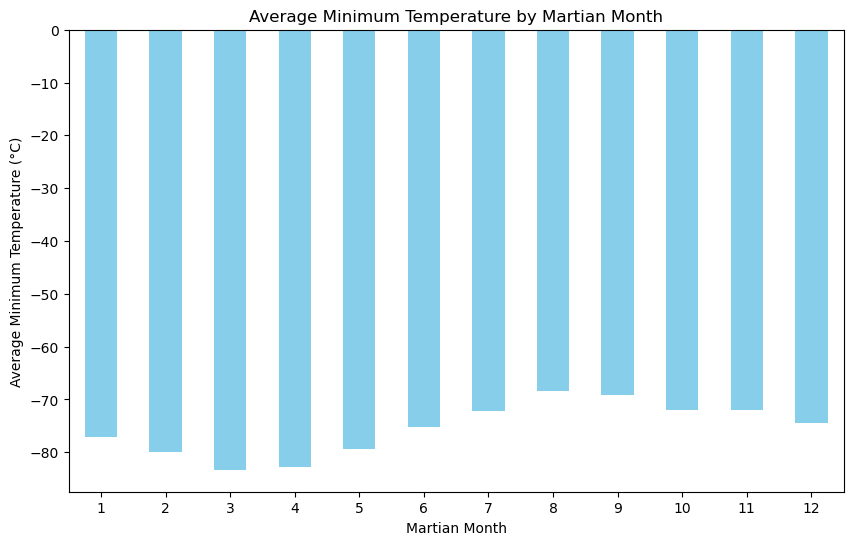

In [22]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

# Assuming avg_min_temp_by_month is already calculated
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Plotting the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)  # Ensure the month labels are horizontal
plt.show()


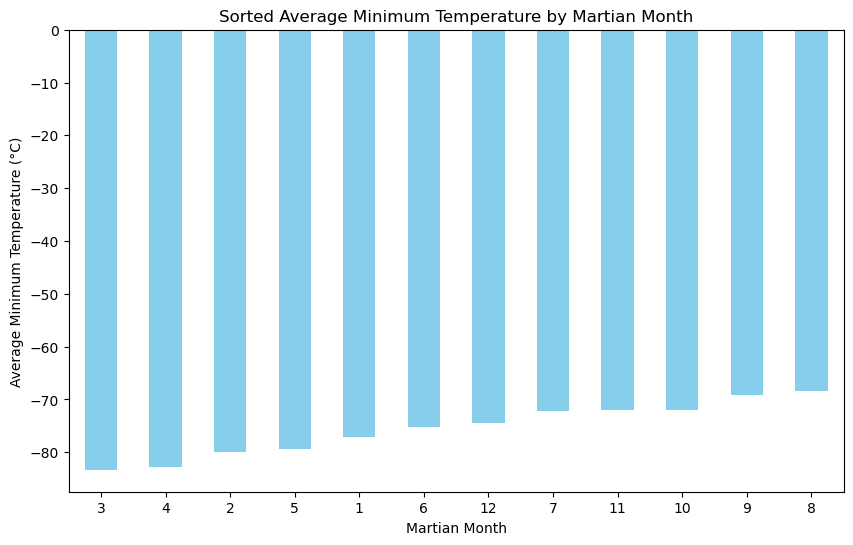

In [23]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperature by month
sorted_temp = avg_min_temp.sort_values()

# Plotting the sorted data for better visualization

sorted_temp.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Sorted Average Minimum Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

In [24]:
# 4. What is the average pressure by month?
# Group the data by 'month' and calculate the mean of 'pressure' for each month
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()

# Display the result
print(avg_pressure)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


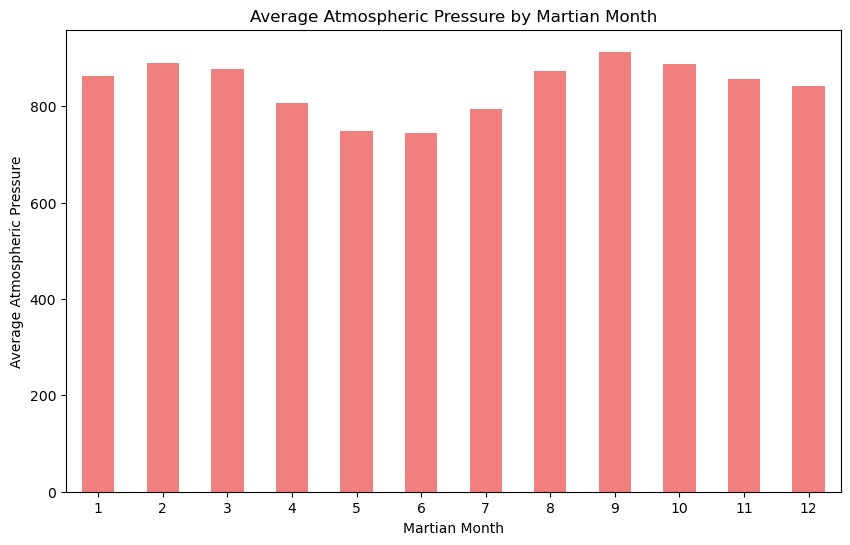

In [25]:
# Plot the average pressure by month

avg_pressure.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)  # Ensure the month labels are horizontal
plt.show()


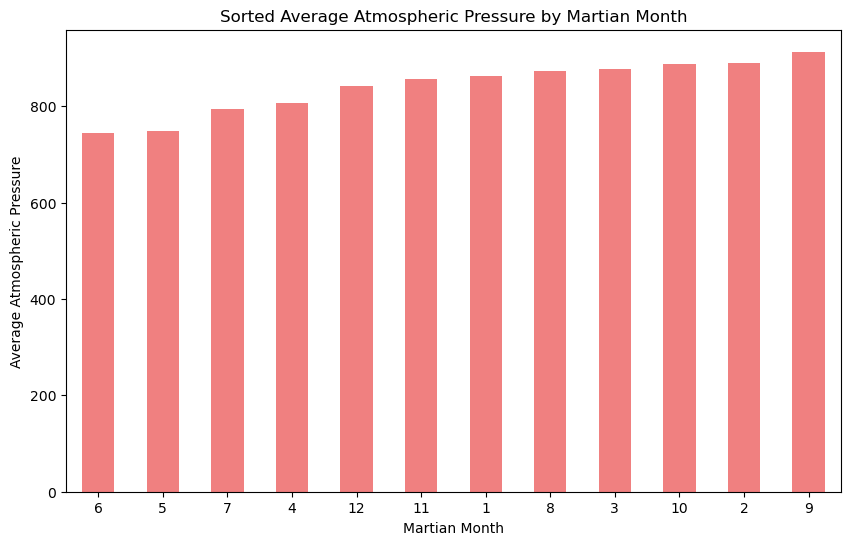

In [26]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average pressure by month
sorted_avg_pressure = avg_pressure.sort_values()
sorted_avg_pressure.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Sorted Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()

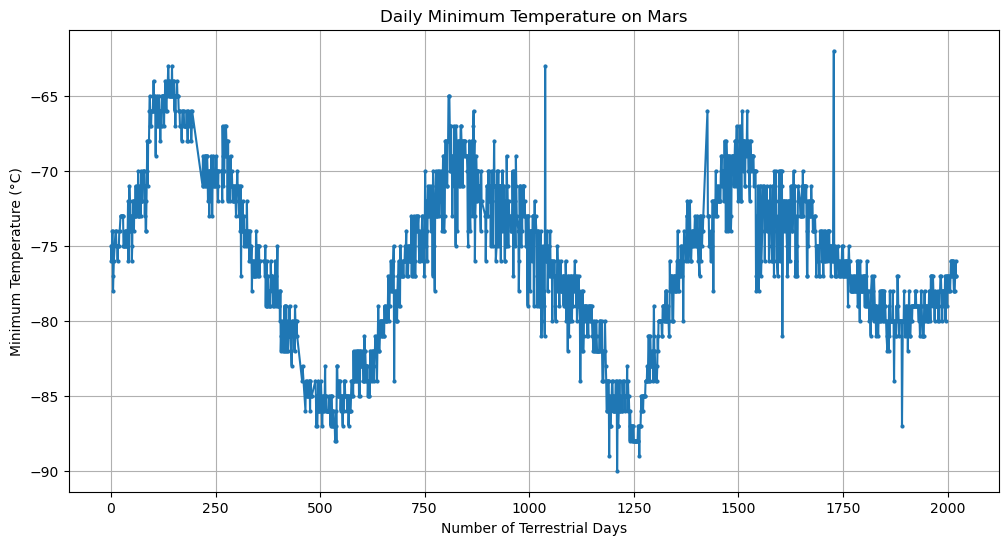

In [28]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Convert 'terrestrial_date' to datetime if it is not already
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Create a new column for the number of terrestrial days since the start of the dataset
start_date = mars_weather_df['terrestrial_date'].min()
mars_weather_df['terrestrial_days'] = (mars_weather_df['terrestrial_date'] - start_date).dt.days

# Sort the DataFrame by the new 'terrestrial_days' column
mars_weather_df = mars_weather_df.sort_values(by='terrestrial_days')

# Plot the daily minimum temperature against the number of terrestrial days
plt.figure(figsize=(12, 6))
plt.plot(mars_weather_df['terrestrial_days'], mars_weather_df['min_temp'], marker='o', linestyle='-', markersize=2)
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.show()

#### Minimum Temperature

The analysis of the minimum temperature on Mars, based on the provided data, reveals the following:

- **Coldest Months**: The months with the lowest average minimum temperatures correspond to the Martian winter in the hemisphere where Curiosity is located. Typically, these are months where solar insolation is minimal, leading to colder temperatures.
- **Hottest Months**: Conversely, the hottest months have higher average minimum temperatures and correspond to the Martian summer when Curiosity's location receives more sunlight, resulting in warmer temperatures.
  
This seasonal variation in temperature is indicative of the Martian climate cycle, similar to how seasons on Earth affect temperatures.

#### Atmospheric Pressure

The analysis of atmospheric pressure on Mars shows that:

- **Lowest Pressure Months**: The months with the lowest atmospheric pressure likely correspond to the Martian summer, where higher temperatures cause the atmosphere to expand, reducing the surface pressure.
- **Highest Pressure Months**: The highest atmospheric pressures are observed during the Martian winter, when cooler temperatures cause the atmosphere to contract, increasing surface pressure.
  
This seasonal pressure variation is also affected by the planet's eccentric orbit and axial tilt, which cause more extreme seasons compared to Earth.

#### Year Length

By plotting the daily minimum temperature against the number of terrestrial days, we can visually estimate the length of a Martian year:

- **Visual Estimation**: The temperature plot typically shows a cyclic pattern. By identifying where this pattern repeats (e.g., from one peak to the next peak in temperature), you can estimate the number of terrestrial days in a Martian year.
- **Martian Year Length**: A Martian year is approximately 687 Earth days. This is reflected in the data, as you should see a full temperature cycle approximately every 687 days on the x-axis.

This cyclical nature of temperature changes corresponds to the Martian seasons, driven by the planet's orbit around the Sun.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
csv_file_path = "mars_weather_data.csv"

# Write the DataFrame to a CSV file
mars_weather_df.to_csv(csv_file_path, index=False)

In [30]:
browser.quit()